# Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.

관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [1]:
import requests # 리퀘스트 모듈 사용
from io import BytesIO # 입출력 라이브러리의 바이너리(2진 데이터)조작을위한 모듈 사용
from PIL import Image, ImageDraw # 파이썬 이미지 라이브러리 안의 이미지 처리 및 그리기  모듈 사용

Subscription Key와 서비스의 주소를 설정합니다.

In [2]:
subscription_key = 'cfed609ad3ef4031bb274bb3e808e302' # MS Azure 구독 키 지정

In [3]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect' # MS Azure URL 지정

분석에 사용할 이미지를 확인합니다.

In [4]:
image_url ='https://cdn.entermedia.co.kr/news/photo/202005/10914_27367_543.jpg' # 이미지 주소 저장 

In [5]:
img =Image.open(BytesIO(requests.get(image_url).content))
# 이미지의 주소를 GET 방식으로 content 요청 및 응답값을 바이너리 조작하여 이미지 연 결과를 변수에 저장

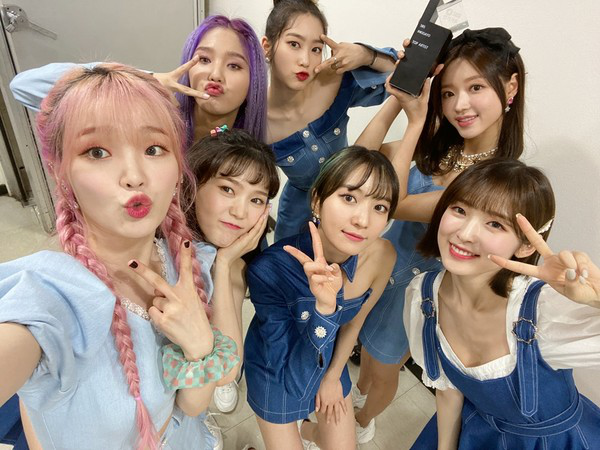

In [6]:
img # 이미지 출력

In [7]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key} # 사전형 리스트 변수에 키값과 밸류값 매칭
params = {'returnFaceID':'ture', 'returnFaceAttributes':'age,gender,emotion'} #  파라미터 값 사전형으로 매핑
# 얼굴인식에 사용되는 파라미터 returnFaceID':'ture  얼굴식별 여부 지정, returnFaceAttributes 얼굴속성 반환값(age,gender,emotion) 지정 

In [9]:
data = {'url' : image_url} #사전형 리스트로 키와 밸류 매핑

서비스를 호출해서 결과를 확인합니다.

In [10]:
response = requests.post(faceDetection_url,headers=headers,params=params,json=data)
# POST 방식으로 MS Azure URL에 파라미터 값을 지정하여 요청된 응답값을 변수에  저장

In [11]:
faces = response.json() # Json 방식으로 응답값 저장

In [12]:
faces # 출력

[{'faceId': '8d59fb3e-a22b-4f99-b376-68f34b4284dd',
  'faceRectangle': {'top': 117, 'left': 67, 'width': 125, 'height': 125},
  'faceAttributes': {'gender': 'female',
   'age': 20.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.146,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.605,
    'sadness': 0.001,
    'surprise': 0.247}}},
 {'faceId': '2a399221-edfd-49ef-b39e-d693fa4077a1',
  'faceRectangle': {'top': 193, 'left': 430, 'width': 79, 'height': 79},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': 'e4019999-20e7-4fe5-9c3f-66030cf6a274',
  'faceRectangle': {'top': 182, 'left': 324, 'width': 72, 'height': 72},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.017,
    'disgust': 0.0,
    'fear': 0.0,
    'happi

In [13]:
draw = ImageDraw.Draw(img) # 이미지위에 그리기 객체 사용

In [15]:
for face in faces: # faces 내용이 끝날때 까지 face에 저장
    rect = face['faceRectangle'] # face안의 내용 중 faceRectangle 항목의 내용 저장
    # 'faceRectangle': {'top': 117, 'left': 67, 'width': 125, 'height': 125}
    left = rect['left'] # 위에 정보 개별 저장
    top = rect['top'] # 위에 정보 개별 저장
    width = rect['width'] # 위에 정보 개별 저장
    height = rect['height'] # 위에 정보 개별 저장
    
    draw.rectangle(((left,top),(left+width,top+height)), outline='red') 
    # 직사각형 왼쪽과 위쪽 기준점을 설정하고 넓이와 높이를 더한 길이의 빨간색 직사각형 그리기
    
    face_info = face['faceAttributes'] # face에 들어있는 faceAttributes 항목의 내용을 저장
    age = face_info['age'] # 저장된 faceAttributes의 항목에서 나이를 선택하여 저장
    gender = face_info['gender'] # 저장된 faceAttributes의 항목에서 성별을 선택하여 저장
    emotion = face_info['emotion'] # 저장된 faceAttributes의 항목에서 감정를 선택하여 저장
    happiness = emotion['happiness'] # 저장된 faceAttributes의 항목에서 감정의 행복지수를 선택하여 저장
    result = 'Gender: ' +gender+ 'happiness: '+str(happiness*100) # 변수에 성별과 감정지수 퍼센티지로 문자화 시켜 저장
   # result = 'Gender: ' +gender+ 'Age:' +str(age) + 'happiness: '+str(happiness*100)
    
    draw.text((left, top), result, fill='red') # 글자를 직사각형 기준점에 빨간색으로 입력
    

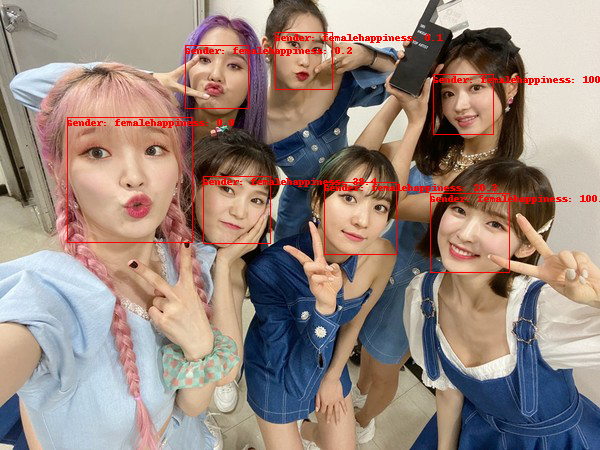

In [16]:
img